In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

np.random.seed(123)

img_width, img_height = 244, 244

num_classes = 2

batch_size = 32
epochs = 30

datagenerator = ImageDataGenerator(rescale = 1./255)
  
train_generator = datagenerator.flow_from_directory(
                  'Train',
                  target_size =(244, 244),  # target_size = input image size
                  batch_size = 20,
                  class_mode ='binary')
  
  
test_generator = datagenerator.flow_from_directory(
                    'Test',
                    target_size =(244, 244),
                    batch_size = 20,
                    class_mode ='binary')

val_generator = datagenerator.flow_from_directory(
                    'Validation',
                    target_size =(244, 244),
                    batch_size = 20,
                    class_mode ='binary')
                


Found 60 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [2]:
def plot(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'y', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


  acc = history.history['accuracy']  #Use accuracy if acc doesn't work
  val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
  plt.plot(epochs, acc, 'y', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()   

In [3]:
# Set up the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, 3)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [4]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    verbose=1
)

Epoch 1/30
3/3 [==============================] - 30s 7s/step - loss: 15.4608 - accuracy: 0.5667 - val_loss: 10.5380 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 19s 6s/step - loss: 3.5977 - accuracy: 0.6500 - val_loss: 0.7084 - val_accuracy: 0.6333
Epoch 3/30
3/3 [==============================] - 18s 6s/step - loss: 0.4595 - accuracy: 0.7167 - val_loss: 0.5763 - val_accuracy: 0.7000
Epoch 4/30
3/3 [==============================] - 18s 6s/step - loss: 0.1869 - accuracy: 0.9333 - val_loss: 0.5773 - val_accuracy: 0.6667
Epoch 5/30
3/3 [==============================] - 18s 6s/step - loss: 0.1138 - accuracy: 0.9667 - val_loss: 1.9337 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 22s 7s/step - loss: 0.1176 - accuracy: 0.9667 - val_loss: 1.4533 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 18s 6s/step - loss: 0.0446 - accuracy: 1.0000 - val_loss: 2.0222 - val_accuracy: 0.5000
Epoch 8/30
3/3 [================

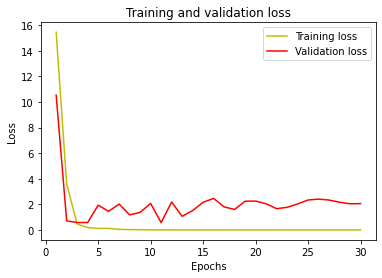

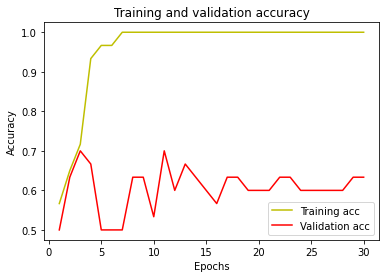

In [5]:
plot(history)

In [6]:
model.evaluate(val_generator)

2/2 [==============================] - 2s 631ms/step - loss: 2.4294 - accuracy: 0.5333


[2.429382085800171, 0.5333333611488342]